# Linear Regression with Ridge and Lasso Regularizer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_boston
boston= load_boston()
boston.data.shape

(506, 13)

In [3]:
boston.target.shape

(506,)

In [4]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos['price']= boston.target

In [6]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
x= bos.drop('price', axis=1)
y= bos['price']


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= 0.33, random_state= 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


# Linear  Regression

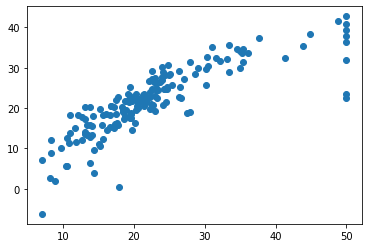

In [10]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()

lin.fit(x_train,y_train)

y_pred= lin.predict(x_test)

plt.scatter(y_test,y_pred )
plt.show()

# Ridge Regression

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge= Ridge()

paramgird= {'alpha':[1e-15,1e-10,1e-5,1e-2,1e-1,1,5,10,15,20,25,35,40,45,50,70,80,90,100]}

ridgereg= GridSearchCV(ridge,paramgird, scoring= 'neg_mean_squared_error' , cv=5)
ridgereg.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 0.1, 1, 5, 10, 15,
                                   20, 25, 35, 40, 45, 50, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridgereg.best_score_)
print(ridgereg.best_params_)

-29.905701947540297
{'alpha': 100}


# Lasso Regressor

In [26]:
from sklearn.linear_model import Lasso
lasso= Lasso()
lassoreg= GridSearchCV(lasso,paramgird, scoring= 'neg_mean_squared_error' , cv=5)
lassoreg.fit(x,y)

C:\Users\91810\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4887.1170123110405, tolerance: 3.919148542079208
  positive)
C:\Users\91810\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4039.6266392808207, tolerance: 3.3071316790123473
  positive)
C:\Users\91810\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4040.303206007457, tolerance: 2.813643886419753
  positive)
C:\Users\91810\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: Convergence

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 0.1, 1, 5, 10, 15,
                                   20, 25, 35, 40, 45, 50, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [27]:
print(lassoreg.best_score_)
print(lassoreg.best_params_)

-34.83043231820267
{'alpha': 0.1}


In [28]:
ridge_pred= ridgereg.predict(x_test)
lasso_pred= lassoreg.predict(x_test)

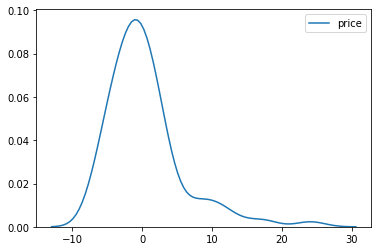

In [31]:
sns.kdeplot(y_test-ridge_pred)
plt.show()

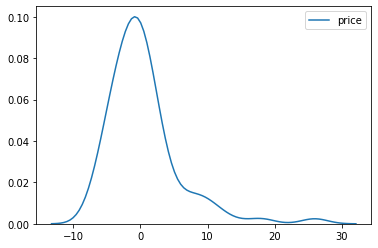

In [32]:
sns.kdeplot(y_test-lasso_pred)
plt.show()